# Legislación

## Contexto
Los cerros que rodean la planicie central de la cuenca de Santiago imponen fuertes restricciones a la circulación de vientos y, por ende, a la renovación del aire al interior de la cuenca. Por ello, en épocas de estabilidad atmosférica los contaminantes quedan atrapados dentro de la cuenca que alberga a la ciudad de Santiago.

Por esta situación en particular santiago se ha visto varias veces enfrentado con una contaminación muy alta, llegando a ser declarada zona saturada por Ozono, Material Particulado, Monoxido de Carbono y Dioxido de Nitrógeno en 1996, el año anterior se ordena la creación del _Plan de Prevención y Descontaminación Atmosférica_ de la Región Metropolitana, que desde 1998 norma con el objetivo de:

El PPDA tiene por objetivo cumplir con las normas de calidad de aire cuyo propósito principal es la protección de la salud de la población. Ésta se encuentra habitualmente expuesta a concentraciones de contaminantes que afectan su bienestar físico y su calidad de vida en general. -- DS N°16 de 1998, Minsegpres, CONAMA

Con esto se realizan desde el mismo año mediciones diarias de distintos agentes contaminantes para evaluar tanto la situación actual del aire en santiago como para medir el rendimiento del PPDA.

| Fecha        | Tipo    | Nombre                                 |
|--------------|---------|----------------------------------------|
| 26-oct-95    | Decreto | Procedimiento PPDA                     |
| 01-ago-96    | Decreto | Zona saturada por O3 MP10 MP2,5 CO NO2 |
| 06-jun-98    | Decreto | Establece PPDA                         |
| 29-ene-04    | Decreto | Actualiza PPDA                         |
| 16-abr-10    | Decreto | Actualiza PPDA                         |
| 15-nov-14    | Decreto | Zona Saturada MP2,5                    |
| 24-nov-17    | Decreto | Establece PPDA                         |


Aquí intentaremos responder si estas legislaciones y regulaciones tienen algún efecto real sobre la disminución de la contaminación en la cuenca de Santiago.

In [1]:
# Imports used on the script

import matplotlib
matplotlib.use('tkagg')

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

In [2]:
# Import climate data
df = pd.read_csv("C:/Users/basty/Documents/intro_mineria_dcc_2019/Proyecto/ClimaYEmisionesData/DatosHito1CleanWithDates.csv")
df['Fecha'] = pd.to_datetime(df['Fecha'])    
df['Fecha_rel'] = (df['Fecha'] - df['Fecha'].min())  / np.timedelta64(1,'D')

# Example of how the table looks
df.head()

,Fecha,anno,mes,dia,O3,MP10,CO,SO2,MP25,NO2,Tmedia,Tmax,Precipitaciones,Fecha_rel
0,1997-04-02,1997,4,2,18.8750,111.565,NaN,NaN,NaN,NaN,17.6,27.5,0.0,0.0
1,1997-04-03,1997,4,3,14.2083,141.333,NaN,NaN,NaN,NaN,16.0,27.2,0.0,1.0
2,1997-04-04,1997,4,4,30.4545,156.950,NaN,NaN,NaN,NaN,17.6,31.1,0.0,2.0
3,1997-04-05,1997,4,5,NaN,0.000,NaN,NaN,NaN,NaN,16.9,29.6,0.0,3.0
4,1997-04-06,1997,4,6,NaN,0.000,NaN,NaN,NaN,NaN,15.2,25.6,0.0,4.0


In [3]:
# We split the database on periods according to different versions of PPDA program

prePPDA = df[(df['Fecha']<'1998/06/06')]

primerPPDA = df[(df['Fecha']>='1998/06/06') & (df['Fecha']<='2004/01/29')]

segundoPPDA = df[(df['Fecha']>='2004/01/29') & (df['Fecha']<='2010/04/16')]

# This one is a complete new DS that declares the RM a MP2.5 Saturation Zone
tercerPPDA = df[(df['Fecha']>='2010/04/16') & (df['Fecha']<='2017/11/24')]

cuartoPPDA = df[(df['Fecha']>='2017/11/24')]

post98 = df[df['Fecha']>='1998/06/06']

post04 = df[df['Fecha']>='2004/01/29']

post10 = df[df['Fecha']>='2010/04/16']

post17 = df[df['Fecha']>='2017/11/24']

cuartoPPDA.head()

,Fecha,anno,mes,dia,O3,MP10,CO,SO2,MP25,NO2,Tmedia,Tmax,Precipitaciones,Fecha_rel
7541,2017-11-24,2017,11,24,17.0,49.0,0.36,NaN,13.0,23.73,16.5,25.4,0.0,7541.0
7542,2017-11-25,2017,11,25,28.0,61.0,0.49,NaN,18.0,27.48,20.9,32.0,0.0,7542.0
7543,2017-11-26,2017,11,26,22.0,61.0,0.52,NaN,16.0,22.65,20.0,29.1,0.0,7543.0
7544,2017-11-27,2017,11,27,21.0,53.0,0.52,NaN,17.0,27.03,19.1,29.2,0.0,7544.0
7545,2017-11-28,2017,11,28,14.0,50.0,0.52,NaN,17.0,25.21,15.4,23.7,0.0,7545.0


In [4]:
# Plot outputs
plt.scatter(df['Fecha'], df['SO2'],  color='black')
plt.title('Proyecciones de SO2')
plt.xlabel('Fecha')
plt.ylabel('μg/m3')
plt.xticks(())
plt.yticks(np.arange(0, 301, step=20))

import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
plt.gcf().autofmt_xdate()

c:\users\basty\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

# Create our imputer to replace missing values with the mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(df['SO2'].values.reshape(len(df['SO2']),1))

X_train = prePPDA['Fecha_rel'].values.reshape(len(prePPDA['Fecha_rel']),1)

Y_train = imp.transform(prePPDA['SO2'].values.reshape(len(prePPDA['SO2']),1))

X_test = post98['Fecha_rel'].values.reshape(len(post98['Fecha_rel']),1)

model = model.fit(X_train,Y_train)
model.named_steps['linear'].coef_
plt.plot(post98['Fecha'], model.predict(X_test) , color='blue', linewidth=3)

In [ ]:
X_train = primerPPDA['Fecha_rel'].values.reshape(len(primerPPDA['Fecha_rel']),1)

Y_train = imp.transform(primerPPDA['SO2'].values.reshape(len(primerPPDA['SO2']),1))

X_test = post04['Fecha_rel'].values.reshape(len(post04['Fecha_rel']),1)

model = model.fit(X_train,Y_train)
model.named_steps['linear'].coef_
plt.plot(post04['Fecha'], model.predict(X_test) , color='blue', linewidth=3)

In [ ]:
X_train = segundoPPDA['Fecha_rel'].values.reshape(len(segundoPPDA['Fecha_rel']),1)

Y_train = imp.transform(segundoPPDA['SO2'].values.reshape(len(segundoPPDA['SO2']),1))

X_test = post10['Fecha_rel'].values.reshape(len(post10['Fecha_rel']),1)

model = model.fit(X_train,Y_train)
model.named_steps['linear'].coef_
plt.plot(post10['Fecha'], model.predict(X_test) , color='blue', linewidth=3)

In [ ]:
# Create linear regression object
#regr = LinearRegression()

# Train the model using the training sets
#regr.fit(prePPDA['Fecha_rel'].values.reshape(len(prePPDA['Fecha_rel']),1), imp.transform(prePPDA['MP10'].values.reshape(len(prePPDA['MP10']),1)))

# Plot outputs
# plt.plot(primerPPDA['Fecha'], regr.predict(X_test) , color='red', linewidth=3)

In [ ]:
X_train = tercerPPDA['Fecha_rel'].values.reshape(len(tercerPPDA['Fecha_rel']),1)

Y_train = imp.transform(tercerPPDA['SO2'].values.reshape(len(tercerPPDA['SO2']),1))

X_test = post17['Fecha_rel'].values.reshape(len(post17['Fecha_rel']),1)

model = model.fit(X_train,Y_train)
model.named_steps['linear'].coef_
plt.plot(post17['Fecha'], model.predict(X_test) , color='blue', linewidth=3)

In [ ]:
plt.show()

# Cosas para el informe
## Caracteristicas de los datos


In [ ]:
## Covarianza
df.cov()

In [ ]:
columnas = ['anno', 'mes', 'dia', 'O3', 'MP10', 'CO', 'SO2', 'MP25', 'SO2', 'Tmedia', 'Tmax', 'Precipitaciones']

print(df.describe())


In [ ]:
print("Cantidad de datos faltantes por columna:")

for col in columnas:
    print(col, ":\t\t", df[col].isna().sum())

Debemos considerar que el Dataset en general se encuentra bastante completo, ya que como vemos en las regresiones finales los atributos que tienen menos datos es porque los atributos se comenzaron a medir bastante despues, como es el caso del _NO2_ que se mide desde 2009 y _MP2,5_ que se mide desde el 2000, un caso interesante es el de _SO2_ que tiene poco más de 5 años en días faltantes y por algún motivo ha disminuído sus medidas a partir de 2015.

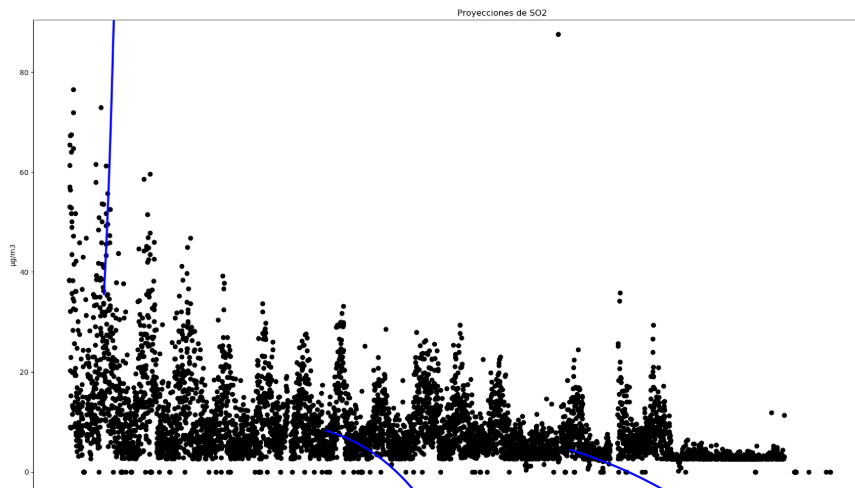

In [ ]:
df.describe()